In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from nltk.tokenize import word_tokenize

uniform_excerpts = pd.read_csv('./data/gutenberg/uniform_excerpts_2.csv')

train, test = train_test_split(uniform_excerpts, test_size=0.2, random_state=200)

In [2]:
X_train = train.drop("label", axis = 1)
X_test = test.drop("label", axis = 1)

y_train = train["label"]
y_test = test["label"]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("train eras", y_train.value_counts())
print("test eras", y_test.value_counts())

(4759, 2) (1190, 2) (4759,) (1190,)
train eras label
1800s    808
1500s    806
1600s    806
1700s    797
1900s    785
1400s    757
Name: count, dtype: int64
test eras label
1900s    215
1700s    203
1600s    194
1500s    194
1800s    192
1400s    192
Name: count, dtype: int64


In [3]:
"""
    features to look at first:
    average word length
    average sentance length
    parts of speech frequencies
    frequencies of certain words/spellings
"""

'\n    features to look at first:\n    average word length\n    average sentance length\n    parts of speech frequencies\n    frequencies of certain words/spellings\n'

In [4]:
"""
    get list of words from 1400s samples
    get vocab as well
"""
# list of strings, each denoting a text excerpt from the 1400s
samples_1400s = train[train["label"] == "1400s"]["text"].tolist() 
test_samples_1400s = test[test["label"] == "1400s"]["text"].tolist() 

vocab_1400s = set()
words_list_1400s = []
for sample in samples_1400s:
    for word in word_tokenize(sample):
        vocab_1400s.add(word.lower())
        words_list_1400s.append(word.lower())


In [ ]:
"""
    get list of words from 1500s samples
    get vocab as well
"""
samples_1500s =  train[train["label"] == "1500s"]["text"].tolist() 
test_samples_1500s = test[test["label"] == "1500s"]["text"].tolist() 

vocab_1500s = set()
words_list_1500s = []
for sample in samples_1500s:
    for word in word_tokenize(sample):
        vocab_1500s.add(word.lower())
        words_list_1500s.append(word.lower())

In [6]:
"""
    get list of words from 1600s samples
    get vocab as well
"""
samples_1600s =  train[train["label"] == "1600s"]["text"].tolist() 
test_samples_1600s = test[test["label"] == "1600s"]["text"].tolist() 

vocab_1600s = set()
words_list_1600s = []
for sample in samples_1600s:
    for word in word_tokenize(sample):
        vocab_1600s.add(word.lower())
        words_list_1600s.append(word.lower())

In [7]:
"""
    get list of words from 1700s samples
    get vocab as well
"""
samples_1700s =  train[train["label"] == "1700s"]["text"].tolist() 
test_samples_1700s = test[test["label"] == "1700s"]["text"].tolist() 

vocab_1700s = set()
words_list_1700s = []
for sample in samples_1700s:
    for word in word_tokenize(sample):
        vocab_1700s.add(word.lower())
        words_list_1700s.append(word.lower())

In [8]:
"""
    get list of words from 1800s samples
    get vocab as well
"""
samples_1800s =  train[train["label"] == "1800s"]["text"].tolist() 
test_samples_1800s = test[test["label"] == "1800s"]["text"].tolist() 

vocab_1800s = set()
words_list_1800s = []
for sample in samples_1800s:
    for word in word_tokenize(sample):
        vocab_1800s.add(word.lower())
        words_list_1800s.append(word.lower())

In [9]:
"""
    get list of words from 1900s samples
    get vocab as well
"""
samples_1900s =  train[train["label"] == "1900s"]["text"].tolist() 
test_samples_1900s = test[test["label"] == "1900s"]["text"].tolist() 

vocab_1900s = set()
words_list_1900s = []
for sample in samples_1900s:
    for word in word_tokenize(sample):
        vocab_1900s.add(word.lower())
        words_list_1900s.append(word.lower())

Getting a list of words that only appear in older texts, and only appear in modern texts is useful for identifying shifts in word use. Word appearances in text may change because the spelling changes, words become obsolete, and words are invented. Since words from only_1X00s_words lists may be dominated by words that are misspelled, or tokenized oddly, it is important to refine these lists to include only actual words, and words that appear frequently. For example "_me._" appears frequently only in text(s) from the 1400s, however looking at it we know "me" is actually still a common word and it for some reason is tokenized oddly in a sample text. 

In [10]:
only_1400s_words = [word for word in words_list_1400s if word not in vocab_1500s and word not in vocab_1600s and word not in vocab_1700s and word not in vocab_1800s and word not in vocab_1900s]

counter14s = Counter(only_1400s_words)
print(counter14s.most_common())
refined_1400s_words = set(["suche", "thay", "wyll", "dyd", "mynde", "woulde", "thyng", "lyfe", "theyr", "thynke","muche","tyme","apon","nowe"])

[('_me._', 69), ('_ogy._', 66), ('suche', 62), ('||', 59), ('thay', 57), ('dyd', 47), ('thynges', 45), ('cannius', 42), ('_hedo._', 34), ('thê', 33), ('eula', 33), ('thei', 29), ('xantip', 25), ('gyue', 24), ('_boni._', 24), ('theyr', 24), ('eulalia', 24), ('boleyn', 24), ('wyse', 23), ('thyng', 23), ('dothe', 22), ('shuld', 22), ('poli', 22), ('whan', 22), ('_bea._', 21), ('xan', 21), ('_spv._', 20), ('gospell', 20), ('apon', 20), ('muche', 19), ('thē', 19), ('loke', 19), ('indulgences', 19), ('praye', 18), ('lyke', 17), ('poliphe', 17), ('thaym', 17), ('florentines', 17), ('habet', 17), ('wolde', 16), ('husbande', 16), ('mã', 16), ('_hed._', 15), ('myght', 15), ('fautes', 15), ('saynt', 14), ('thayr', 14), ('canni', 14), ('dede', 14), ('husbandes', 14), ('remission', 14), ('xantippa', 14), ('certayne', 14), ('lyfe', 13), ('_spu._', 13), ('wyfe', 13), ('goodes', 13), ('longe', 13), ('sayde', 13), ('mylke', 13), ('moche', 13), ('niccolo', 13), ('knowe', 13), ('nothyng', 12), ('poliphem

In [11]:
only_1500s_words = [word for word in words_list_1500s if word not in vocab_1400s and word not in vocab_1600s and word not in vocab_1700s and word not in vocab_1800s and word not in vocab_1900s]

counter15s = Counter(only_1500s_words)
print(counter15s.most_common())
refined_1500s_words = set(["looke","beene","keepe","queene","speach","crowne","feete","seemes","returne"])
refinded_old_words_vocab = refined_1400s_words | refined_1500s_words

[('ile', 49), ('exeunt', 40), ('heere', 38), ('y^e', 32), ('leaue', 23), ('dromio', 19), ('heauen', 19), ('finde', 19), ('antipholus', 18), ('syracuse', 18), ('demetrius', 17), ('claudio', 14), ('clo', 13), ('hermia', 13), ('warwick', 13), ('clarence', 13), ('musicke', 13), ('macbeth', 13), ('bassanio', 13), ('beene', 13), ('ped', 13), ('ros', 12), ('beleeue', 12), ('_exit._', 12), ('mistris', 12), ('turtle', 12), ('sicke', 12), ('gloucester', 12), ('ducats', 12), ('answere', 11), ("o'th", 11), ('rosaline', 11), ('ephesus', 11), ('glost', 11), ('queene', 10), ('fellowes', 10), ('pedro', 10), ('lysander', 10), ('serue', 10), ('sweare', 10), ('romeo', 10), ('forme', 10), ('bru', 10), ('ramus', 10), ('pandarus', 10), ('weare', 10), ('yorke', 10), ('servingman', 10), ('coriolanus', 10), ('eros', 10), ('blesse', 9), ('twixt', 9), ("i'th", 9), ('suffolk', 9), ('timon', 9), ('iohn', 9), ('cinna', 9), ('enobarbus', 9), ('themselues', 8), ('signior', 8), ('leon', 8), ('ham', 8), ('fabian', 8), 

In [12]:
modern_words_list = words_list_1600s + words_list_1700s + words_list_1800s + words_list_1900s
old_words_vocab = vocab_1400s | vocab_1500s
modern_words_list.remove(",")
modern_words_list.remove(".")
only_modern_words = []
for word in modern_words_list:
    if word not in old_words_vocab:
        # print(word,"\n")
        only_modern_words.append(word)
counter_modern = Counter(only_modern_words)
print(counter_modern.most_common())
refinded_modern_words_vocab = set(["beneath", "class", "system", "interest", "american", "america", "started","stopped","expression","blue"])

[("'ve", 109), ('around', 107), ('mrs.', 98), ('...', 87), ("'m", 85), ('miss', 83), ('across', 68), ('|', 51), ('size', 44), ('started', 42), ('chair', 39), ('nearly', 39), ('getting', 38), ('beneath', 38), ('....', 38), ('position', 36), ('hall', 35), ('trying', 34), ('maybe', 34), ('waiting', 33), ('floor', 32), ('circumstances', 31), ('planet', 30), ('bank', 30), ('board', 30), ('smoke', 29), ('boat', 29), ('minute', 28), ('footnote', 28), ('energy', 28), ('nodded', 28), ('darkness', 27), ('material', 27), ('complete', 27), ('village', 27), ('american', 27), ('color', 27), ('closed', 27), ('animal', 25), ('specimens', 25), ('lifted', 24), ('monsieur', 24), ('shook', 24), ('weeks', 24), ('feelings', 24), ('america', 24), ('ahead', 24), ('guess', 23), ('movement', 23), ('control', 23), ('national', 23), ('evidence', 23), ('wo', 23), ('group', 23), ('expression', 22), ('handsome', 22), ('colonel', 22), ('sandy', 22), ('british', 22), ('listening', 22), ('gun', 22), ('joseph', 21), ('s

In [ ]:
print("Manually refined 1400s only vocab", refined_1400s_words)
print("Manually refined 1500s only vocab", refined_1500s_words)
print("Manually refined vocab from more modern time", refinded_modern_words_vocab)
print("Full set of words found only in 1400s and 1500s texts...", (only_1400s_words + only_1500s_words)[:25])
print("Full set of words found only in 16, 17, 18, 1900s texts...", only_modern_words[:25])

Manually refined 1400s only vocab {'woulde', 'dyd', 'suche', 'thay', 'tyme', 'apon', 'thynke', 'mynde', 'theyr', 'wyll', 'lyfe', 'nowe', 'thyng', 'muche'}
Manually refined 1500s only vocab {'keepe', 'returne', 'beene', 'seemes', 'crowne', 'feete', 'speach', 'looke', 'queene'}
Manually refined vocab from more modern time {'started', 'class', 'stopped', 'beneath', 'blue', 'interest', 'expression', 'system', 'america', 'american'}
Full set of words found only in 1400s and 1500s texts... ['suche', 'lyke', 'cõuenient', 'wourthy', '_spv._', 'vtterly', '_hedoni._', 'wheras', 'hauntynge', 'catche', 'newe', 'otherwyse', 'agew', 'scabbes', 'throughe', '||d.ii||', 'desease', 'deathe', 'lyfe', 'cary', 'bodye', 'resemblyng', 'shadowes', 'plesure', 'dispice']
Full set of words found only in 16, 17, 18, 1900s texts... ['373', '_athanasius_', '_gerard', 'vossius_', 'ms.', '_ascanius_', '_italy_', 'commentary', '_ephræm', 'syrus_', 'martyrs', '_alexandria_', 'martyrs', '_egypt_', 'metropolis', '_chryso

In [14]:
# def contains_old_word(example):
#     return {word : 1 if word in example else 0 for word in refinded_old_words_vocab}

def contains_1400s_word_refined_list(example): 
    return {word : 1 if word in example else 0 for word in refined_1400s_words}

# def contains_1400s_word_large_list(example): 
#     return {word : 1 if word in example else 0 for word in only_1400s_words[:100]}

def contains_1500s_word_refined_list(example): 
    return {word : 1 if word in example else 0 for word in refined_1500s_words}

# def contains_1500s_word_large_list(example): 
#     return {word : 1 if word in example else 0 for word in only_1500s_words[:100]}

def contains_new_word_refined_list(example): 
    return {word : 1 if word in example else 0 for word in refinded_modern_words_vocab}

def contains_new_word_large_list(example): 
    return {word : 1 if word in example else 0 for word in modern_words_list[:250]}

# def count_old_word(example):
#     return {word : 1 if word in example else 0 for word in refinded_modern_words_vocab}

# def new_word_prop(example):
#     new_word_count = 0
#     for word in modern_words_list[:250]:
#         if word in example:
#             new_word_count += 1
#     total_word_count = len(example)
#     proportion = new_word_count/total_word_count
#     return {'proportion new words' : proportion}




Counting the number of new words makes the model perform far worse. Even proportion doesn't help much. 

In [15]:
def num_sentences(example):
    count = len(example.split(".")) + len(example.split("?")) + len(example.split("!"))
    return count

def num_words(example):
    return len(word_tokenize(example))

def avg_sentence_length(example):
    return num_words(example) / num_sentences(example)

def sentence_length_feature(example):
    return{"avg_sentence_length" : avg_sentence_length(example)}
    # TODO 

def pos_frequencies():
    ...
    # TODO

avg_sentence_lengths = [(avg_sentence_length(sample)) for sample in train["text"].tolist()]
train["avg_length"] = avg_sentence_lengths

label
1400s    16.669799
1500s    13.289118
1600s    17.183783
1700s    16.313351
1800s    14.163805
1900s    11.083266
Name: avg_length, dtype: float64


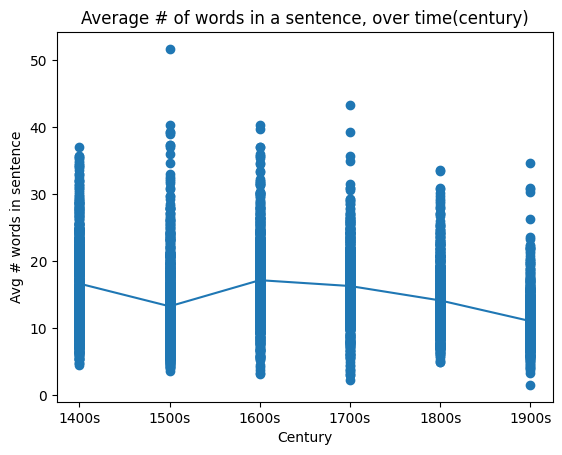

In [16]:
plt.plot(train.groupby("label")["avg_length"].mean())
plt.scatter(train["label"], train["avg_length"])
plt.title("Average # of words in a sentence, over time(century)")
plt.xlabel("Century")
plt.ylabel("Avg # words in sentence")
print(train.groupby("label")["avg_length"].mean())

<Axes: xlabel='avg_length', ylabel='label'>

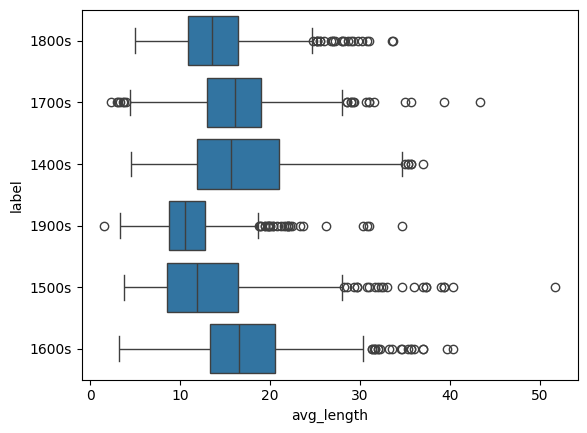

In [17]:
import seaborn as sns
sns.boxplot(data = train, x = "avg_length", y = "label")

As seen by the boxplots, and the line plot, there is significant overlap and no clear trend in the number of words in a sentence. This could be why the model doesn't work really well with with that as a feature, and actually gets worse when you add it as a feature to the existing model.

In [18]:
def num_chars(example):
    return len(example)

def avg_word_length(example):
    return num_chars(example) / num_words(example)

def word_length_feature(example):
    return{"avg_word_length" : avg_word_length(example)}
    # TODO 

avg_word_lengths = [(avg_word_length(sample)) for sample in train["text"].tolist()]
train["avg_word_len"] = avg_word_lengths


label
1400s    4.829415
1500s    4.425221
1600s    4.691637
1700s    4.815761
1800s    4.641766
1900s    4.687077
Name: avg_word_len, dtype: float64


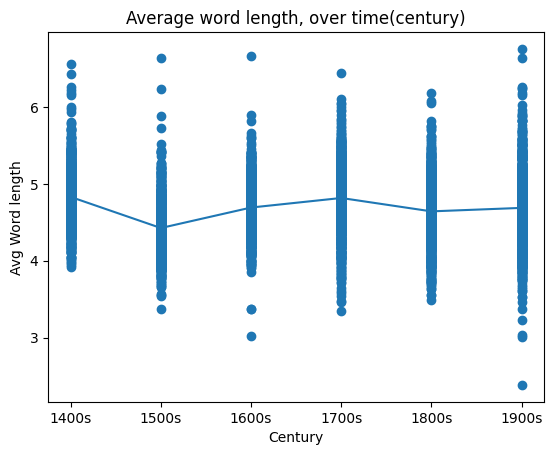

In [19]:
plt.plot(train.groupby("label")["avg_word_len"].mean())
plt.scatter(train["label"], train["avg_word_len"])
plt.title("Average word length, over time(century)")
plt.xlabel("Century")
plt.ylabel("Avg Word length")
print(train.groupby("label")["avg_word_len"].mean())

<Axes: xlabel='avg_word_len', ylabel='label'>

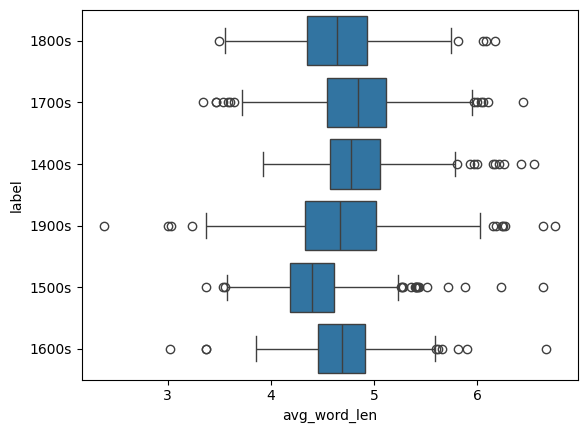

In [20]:
import seaborn as sns
sns.boxplot(data = train, x = "avg_word_len", y = "label")

As seen by the line plot and the boxplots: like the avg sentance length feature, there is no clear trend and a lot of overlap in these features. These features will not help our model differentiate between texts nor will it help us identify era. This is a disapointing finding. 

In [21]:
def generate_bigrams(example):
    tokens = word_tokenize(example.lower())
    bigrams = []
    for i in range(len(tokens) - 1):
        bigrams.append((tokens[i], tokens[i+1]))
    return bigrams

def bigram_feature(example):
    bigrams_found = generate_bigrams(example)
    return {(w1,w2) : 1 for w1,w2 in bigrams_found}

In [30]:
def create_feature_dictionary_nb(example):
    features = {}
    for feat in [contains_new_word_refined_list, contains_1400s_word_refined_list, contains_1500s_word_refined_list,contains_new_word_large_list]: 
        features.update(feat(example))
    return features

In [31]:
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy
from nltk.metrics import ConfusionMatrix
import random

train_feat = [(create_feature_dictionary_nb(ex), "1400s") for ex in samples_1400s] + \
        [(create_feature_dictionary_nb(ex), "1500s") for ex in samples_1500s] + \
        [(create_feature_dictionary_nb(ex), "1600s") for ex in samples_1600s] + \
        [(create_feature_dictionary_nb(ex), "1700s") for ex in samples_1700s] + \
        [(create_feature_dictionary_nb(ex), "1800s") for ex in samples_1800s] + \
        [(create_feature_dictionary_nb(ex), "1900s") for ex in samples_1900s]

random.seed(42)
random.shuffle(train_feat)

split_percent = .2

cutoff = int(split_percent * len(train_feat))

validation_set = train_feat[:cutoff]
training_set = train_feat[cutoff:]

model = NaiveBayesClassifier.train(training_set)

print('Validation accuracy using word appearances: .431')
print("Validation acc using only sentence length: .216")
print("Baseline of performance is 1/6 = .167, accuracy we would expect if we chose the same label every time.")
print("validation acc using only average word length as a feature: .1472")
print("valid acc on bigram model alone : .7024")
print('Validation accuracy using bigram with other features: {}'.format(accuracy(model, validation_set)))
# print(model.show_most_informative_features(40))

Validation accuracy using word appearances: .431
Validation acc using only sentence length: .216
Baseline of performance is 1/6 = .167, accuracy we would expect if we chose the same label every time.
validation acc using only average word length as a feature: .1472
valid acc on bigram model alone : .7024
Validation accuracy using bigram with other features: 0.4374342797055731


In [24]:
def create_feature_dictionary_dt(example):
    features = {}
    for feat in [contains_new_word_refined_list, contains_1400s_word_refined_list, contains_1500s_word_refined_list,contains_new_word_large_list, word_length_feature, sentence_length_feature]: 
        features.update(feat(example))
    return features

In [28]:
test_set = [(create_feature_dictionary_nb(ex), "1400s") for ex in test_samples_1400s] + \
        [(create_feature_dictionary_nb(ex), "1500s") for ex in test_samples_1500s] + \
        [(create_feature_dictionary_nb(ex), "1600s") for ex in test_samples_1600s] + \
        [(create_feature_dictionary_nb(ex), "1700s") for ex in test_samples_1700s] + \
        [(create_feature_dictionary_nb(ex), "1800s") for ex in test_samples_1800s] + \
        [(create_feature_dictionary_nb(ex), "1900s") for ex in test_samples_1900s]

In [29]:
print('Test accuracy using bigram with other features: {}'.format(accuracy(model, test_set)))


Test accuracy using bigram with other features: 0.7033613445378152


Predicting exact year with a regression model is not possible due to lack of data on exact publication date, all of our labels are in terms of centuries.